In [14]:
!pip install aguaclara

In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$ v_c = 2.41 v_o \sqrt{\frac{w_0}{x}}$$

The minimum distance s that this equation makes sense is where $v_o$ = $v_c$.

$$ 1 = 2.41^2 \frac{w_0}{x_{min}}$$

$$ x_{min} =  2.41^2 w_0$$

The distance over which the velocity is reduced by a factor of 2 is:

$$ 0.5 = 2.41  \sqrt{\frac{w_0}{x}}$$

$$ x_{0.5v} =  4 * 2.41^2 w_0 = 23w_0$$
$$ x_{0.25v} =  16 * 2.41^2 w_0 = 96w_0$$



266.7 millimeter / second
23.232400000000002
the half velocity distance is 371.7 millimeter


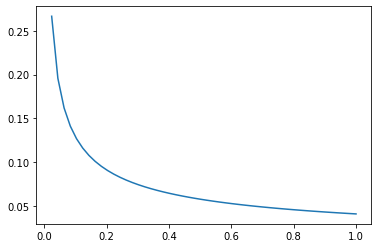

In [31]:
Sed_w = 42 * u.inch
Jet_w = 4 * u.mm
Sed_v_up = 1 * u.mm/u.s 
Sed_v_jet = (Sed_v_up * Sed_w/Jet_w).to(u.mm/u.s)
print(Sed_v_jet)

def v_jet(v_0,w_0,x):
  return (2.41 * v_0 * np.sqrt(w_0/x)).to(u.m/u.s)

xhalfv = (2.41*4)**2 * Jet_w
print((2.41*2)**2)
print('the half velocity distance is',xhalfv)
min_x = (2.41**2 * Jet_w).to(u.m)

xrange = np.linspace(min_x.magnitude,1,50) * u.m 
plt.plot(xrange,v_jet(Sed_v_jet,Jet_w,xrange))


In [0]:
Q=100 * u.L/u.s
Q_ratio = 0.85


Analyze Casey's jet experiments
Flocculator diameter

First figure out what the flow rate was
Then figure out what the inlet tube diameter was for the maximum recommended velocity.
Use current equations to estimate what that EDR_max is.
Turn that maximum EDR into a guideline for our designs.


In [42]:
S_jet = 12.7 * u.mm
D_jet = np.linspace(2,11.7,50) * u.mm
D_jet_min = 2 * u.mm
V_jet_max = 1.9 * u.m/u.s
A_jet_min = ac.area_circle(D_jet_min)
Q_12est = (V_jet_max*A_jet_min).to(u.mL/u.s)
# print('Flow rate for 1.6 mm/s upflow',Q_16)
# Q_12est = Q_16/1.6*1.2
print('Flow rate for 1.2 mm/s upflow based on maximum jet velocity',Q_12est)
#check Re in flocculator
temp = 20 * u.degC
Re_12 = 815
D_floc = 9.5 * u.mm
v_floc = Re_12 * ac.viscosity_kinematic_water(temp)/D_floc
Q_floc_12 = (v_floc * ac.area_circle(D_floc)).to(u.mL/u.s)
print('Flow rate for 1.2 mm/s upflow',Q_floc_12)
# Use the average of the two flow rate estimates
Q_12 = (Q_12est +  Q_floc_12)/2
print('Flow rate for 1.2 mm/s upflow',Q_12)


v_ratio = 1.9/0.06
print('velocity ratio',v_ratio)
A_ratio = (11.7/2)**2
print('area ratio',A_ratio)

Flow rate for 1.2 mm/s upflow based on maximum jet velocity 5.969 milliliter / second
Flow rate for 1.2 mm/s upflow 6.103 milliliter / second
Flow rate for 1.2 mm/s upflow 6.036 milliliter / second
velocity ratio 31.666666666666668
area ratio 34.2225


$$A_{PlaneJet} = S_{Tank}W_{Jet} = \frac{\pi}{4}D_{Jet}^2$$
$$ \epsilon_{Jet} = \frac{(\Pi_{Jet}V_{Jet})^3}{W_{Jet}}$$
Solve for $D_{Jet}$
$$W_{Jet} = \frac{\pi D_{Jet}^2}{4S_{Tank}}$$
$$V_{Jet} = \frac{Q}{\frac{\pi}{4}D_{Jet}^2}$$

$$ \epsilon_{Jet} = \frac{(\Pi_{Jet}\frac{Q}{\frac{\pi}{4}D_{Jet}^2})^3}{\frac{\pi D_{Jet}^2}{4S_{Tank}}}$$

$$ \epsilon_{Jet} = \Pi_{Jet}^3\frac{4^4 Q^3 S_{Tank}}{\pi^4D_{Jet}^8}$$

$$  D_{Jet}= \left(\Pi_{Jet}^3\frac{4^4 Q^3 S_{Tank}}{\pi^4 \epsilon_{Jet}}\right)^\frac{1}{8}$$


In [57]:

EDR_Casey = 300 * u.mW/u.kg
Pi_jet_Plane_Casey = 0.23
D_jet_min = ((Pi_jet_Plane_Casey**3 * 4**4 * Q_12**3 * S_jet/np.pi**4/EDR_Casey)**(1/8)).to(u.mm)
print('The minimum tube diameter corresponding to the max successful EDR is',D_jet_min)

The minimum tube diameter corresponding to the max successful EDR is 4.833 millimeter


$$\varepsilon_{Max} = \Pi_{JetPlane} \frac{  \bar v_{Jet} ^3}{W_{Jet}}$$

$$W_{Jet} = \frac{Q_{Jet}}{\bar v_{Jet}S_{Jet}}$$

$$\varepsilon_{Max} = \Pi_{JetPlane} \frac{  \bar v_{Jet} ^4 S_{Jet}}{Q_{Jet}}$$

We need to identify the actual constraint and show that it is a dimensionless parameter. 

$$G_{CS} = \sqrt{\frac{\bar \varepsilon}{\nu}}$$

$$\tau = \mu \frac{du}{dy}$$

Thereforce the force per unit area (shear stress) is given by

$$\tau = \mu G$$

Thus the design constraint for energy dissipation rates or velocity gradients should be this shear stress

$$\nu = \frac{\mu}{\rho}$$

$$\tau = \rho \sqrt{\varepsilon \nu }$$

In [60]:
v_jet_max_successful = Q_12/ ac.area_circle(D_jet_min)
EDR_max = (ac.con.JET_PLANE_RATIO *v_jet_max_successful**4 * S_jet/Q_12).to(u.mW/u.kg)
print('The revised maximum energy dissipation rate for the plane jet is',EDR_max)
tau_max = (ac.density_water(temp) * np.sqrt(EDR_max * ac.viscosity_kinematic_water(temp))).to(u.Pa)
print('The maximum shear stress for sed tank inlets is', tau_max)
G_max = (tau_max/ ac.viscosity_dynamic_water(temp)).to(u.Hz)
print('The maximum velocity gradient that can be used prior to the sed tank is',G_max)

The revised maximum energy dissipation rate for the plane jet is 305.7 milliwatt / kilogram
The maximum shear stress for sed tank inlets is 0.5529 pascal
The maximum velocity gradient that can be used prior the sed tank is 552 hertz


Can we turn this shear stress into a floc size?
If we assume 3 covalent bonds at 1.6 nN each, then we can solve for the 

The [force acting on a floc to tear it apart](https://aguaclara.github.io/Textbook/Flocculation/Floc_Intro.html#equation-shear-force-on-doublet) is proportional to 

$$F_{shear_{max}} = \frac{3 \pi}{4} d_{floc}^2 \mu G$$

where $\mu G$ is the fluid shear stress. Thus given a fluid shear stress and floc diameter we can find the force that is acting to tear the floc apart.

$$F_{shear_{max}} = \frac{3 \pi}{4} d_{floc}^2 \tau$$

If we know the bond strength (estimated to be 1.6 nN for covalent bonds) then we can solve for the diameter of the floc.

$$F_{covalent} = \frac{3 \pi}{4} d_{floc}^2 \tau$$

$$d_{floc}=\sqrt{\frac{4F_{covalent}}{3 \pi \tau}}$$


In [62]:
F_covalent = 1.6 * u.nN
d_floc_diffuser = (np.sqrt(4*F_covalent/(1 * np.pi * tau_max))).to(u.um)
print(d_floc_diffuser)
# now how fast does this baby settled?
ConcAl = 5 * u.mg/u.L
ConcClay = 50 * u.NTU

v_t = ac.vel_term_floc(ConcAl,ConcClay, ac.PACl ,ac.Clay,1.8,d_floc_diffuser,temp)
print(v_t.to(u.mm/u.s))

60.7 micrometer
0.09354 millimeter / second


Okay! The EDR estimate from Casey is solid. How does this translate into design?
Let's put this in terms of vjet and jet spacing given this shear stress constraint.

From continuity we have

$$\bar v_{jet} W_{jet} = \bar v_{z_{fb}} W_{Sed}$$

Solve to find the thickness of the plane jet.

$$W_{jet} = \frac{\bar v_{z_{fb}} W_{Sed}}{\bar v_{jet} }$$

We have a constraint on the fluid shear stress from Casey's research of 0.55 Pa.

$$\tau_{max} = \rho \sqrt{\varepsilon \nu }$$

Substitute the definition of energy dissipation rate in a plane jet.

$$\varepsilon_{Max} = \Pi_{JetPlane} \frac{  \bar v_{Jet} ^3}{W_{Jet}}$$

to get

$$\tau_{max} = \rho \sqrt{\nu \Pi_{JetPlane} \frac{  \bar v_{Jet} ^3}{W_{Jet}}}$$

Use continuity to eliminate $W_{jet}$

$$\tau_{max} = \rho \bar v_{Jet} ^2 \sqrt{ \frac{\nu \Pi_{JetPlane}}{\bar v_{z_{fb}} W_{Sed}}}$$

Now solve for $\bar v_{Jet}$

$$\bar v_{Jet} = \left(\frac{\tau_{max}}{\rho}\right)^\frac{1}{2} \left( \frac{\bar v_{z_{fb}} W_{Sed}}{\nu \Pi_{JetPlane}}\right)^\frac{1}{4}$$



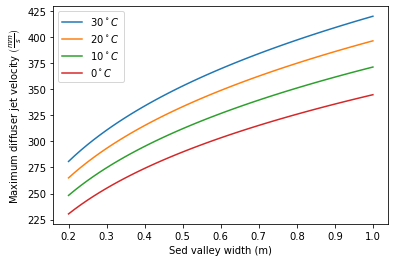

In [56]:
v_z_fb = 1 *u.mm/u.s

W_sed_range = np.linspace(0.2,1,50)*u.m
def v_jet_max(v_z_fb, W_sed,tau_max,temp):
  return (np.sqrt(tau_max / ac.density_water(temp)) * (v_z_fb * W_sed / ac.viscosity_kinematic_water(temp) / ac.con.JET_PLANE_RATIO)**(1/4)).to(u.mm/u.s)

plt.plot(W_sed_range,v_jet_max(v_z_fb,W_sed_range,tau_max,30*u.degC));
plt.plot(W_sed_range,v_jet_max(v_z_fb,W_sed_range,tau_max,20*u.degC));
plt.plot(W_sed_range,v_jet_max(v_z_fb,W_sed_range,tau_max,10*u.degC));
plt.plot(W_sed_range,v_jet_max(v_z_fb,W_sed_range,tau_max,0.1*u.degC));
plt.xlabel('Sed valley width (m)');
plt.ylabel(r'Maximum diffuser jet velocity $\left(\frac{mm}{s}\right)$');
plt.legend(['$30^\circ C$','$20^\circ C$','$10^\circ C$','$0^\circ C$']);

Now we can find the maximum manifold velocity
$$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$

Given the velocity in the manifolds, could we minimize the plastic given a dimension for the sed tank? 